In [1]:
import numpy as np

from glob import glob as glob
import re

from cswsims import *
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

/Users/abeukers/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### load data

In [27]:
# paths to load
TASK = 'CSW65'
fpaths = glob('evaldata/*%s*False.npy'%(TASK))
for i in fpaths: print(i)


evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(10)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(200)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(50)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(1)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(4)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(1000)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(49980)epb(35)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(2)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(10000)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(49700)epb(700)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(49800)epb(600)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(49600)epb(800)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_

In [28]:
# load data into dict
dataD = {}
for fpath in fpaths:
  print(fpath)
  epb = int(re.findall('\d+',fpath)[-3])
  flush = fpath.split('-')[-1].split('.')[0].split('_')[-1]
  if epb not in dataD:
    dataD[epb] = {}
  # load data
  evaldata = np.load(fpath)
  yhatdata = evaldata['yhat']
  dataD[epb][flush] = yhatdata
  


evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(10)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(200)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(50)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(1)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(4)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(1000)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(49980)epb(35)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(2)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(50000)epb(10000)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(49700)epb(700)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(49800)epb(600)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW65-curr_ne(49600)epb(800)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_

### global variables

In [29]:
idx2path_dict = {0:(['10','0','1','3','5']),
                 1:(['10','0','2','4','6']),
                 2:(['11','0','1','4','5']),
                 3:(['11','0','2','3','6'])}

depth2tonodes = {2:[3,4],3:[5,6],4:[7,8]}

epbL = list(dataD.keys())
print(epbL)

[10, 200, 50, 1, 4, 1000, 35, 2, 10000, 700, 600, 800, 100, 25, 5000, 3, 900, 500, 300, 15, 5, 400]


### (num_nets,epochs,path,depth,len,num_classes)[softmax]

### group average

In [30]:
## params
# epb = 5
depth = 2
path = 3
tonode1,tonode2 = depth2tonodes[depth]

for epb in epbL:
  print(epb)
  ## compute mean
  yhatdata = dataD[epb]['False'].squeeze()
  # epochs,path,depth,tonode
  yhat_mean = np.mean(yhatdata,0)
  yhat_std = np.std(yhatdata,0)
  num_epochs = len(yhat_mean)

  ## plot 
  plt.figure(figsize=(20,8))
  ax = plt.gca()
  ax.plot(yhat_mean[:,path,depth,(tonode1,tonode2)])
#   ax.fill_between(np.arange(num_epochs),yhat_mean-yhat_std,yhat_mean+yhat_std,
#                     facecolor='blue',alpha=0.3)

  # background
  ax.fill_between([0,num_epochs-10000],-.05,1.05,
                    facecolor='green',alpha=0.1)
  ax.fill_between([num_epochs-10000,num_epochs],-.05,1.05,
                    facecolor='red',alpha=0.1)

  title = 'group-%s-epb_%i-flush_%s-depth_%i'%(TASK,epb,flush,depth)
  plt.title(title,size=30)
  plt.savefig('figures/%s/%s'%(TASK,title))
  plt.close('all')

10
200
50
1
4
1000
35
2
10000
700
600
800
100
25
5000
3
900
500
300
15
5
400


### subject level plot

In [31]:
# epb = 1000
depth = 2
path = 0
tonode1,tonode2 = depth2tonodes[depth]
flush = 'False'

for epb in epbL:
  print(epb)
  Fyhat = dataD[epb][flush].squeeze()
  fig,axarr = plt.subplots(5,10,figsize=(40,20));axarr=axarr.reshape(-1)
  for sub_num,ax in enumerate(axarr):
    ax.plot(Fyhat[sub_num,:,path,depth,(tonode1,tonode2)].T,lw=.05)
    ax.set_ylim(0,1)
    ax.set_xlim(-100,60100)

  title = 'sublvl-%s-epb_%i-flush_%s-depth_%i'%(TASK,epb,flush,depth)
  plt.suptitle(title,size=50)
  plt.savefig('figures/%s/%s'%(TASK,title))
  plt.close('all')

10
200
50
1
4
1000
35
2
10000
700
600
800
100
25
5000
3
900
500
300
15
5
400


### others

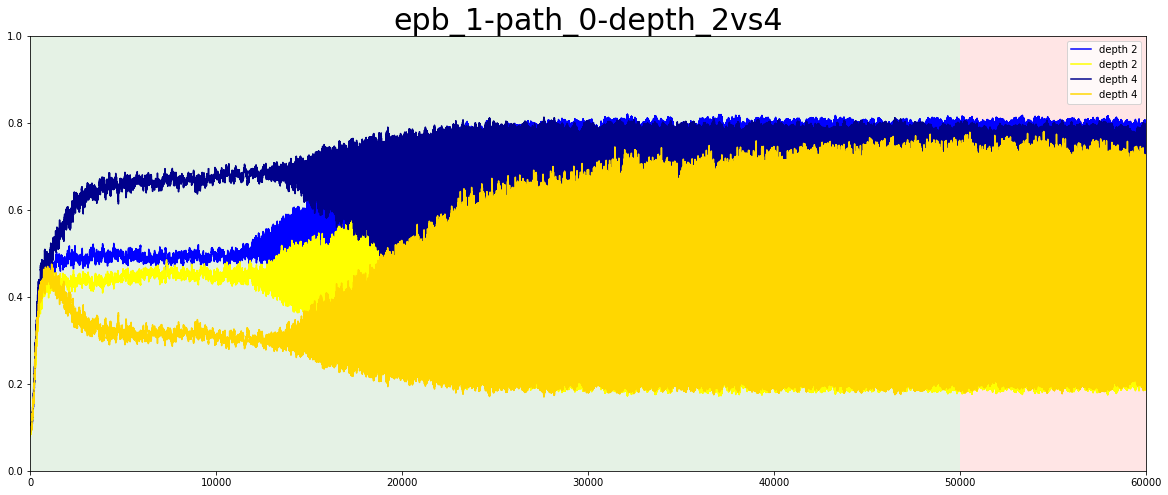

In [100]:
depth = 4
path = 0
epb = 1


# for epb in epbL:
plt.figure(figsize=(20,8))
ax = plt.gca()


# Tyhat = dataD[epb]['True']

# Tyhat_M = np.mean(Tyhat,0).squeeze()
# Tyhat_M1 = Tyhat_M[:,path,depth,tonode1]
# Tyhat_M2 = Tyhat_M[:,path,depth,tonode2]

# ax.plot(Tyhat_M1,c='red',label='flush')
# ax.plot(Tyhat_M2,c='green',label='flush')

Fyhat = dataD[epb]['False']
Fyhat_M = np.mean(Fyhat,0).squeeze()

# depth 2 
depth = 2
tonode1,tonode2 = depth2tonodes[depth]
Fyhat_M1 = Fyhat_M[:,path,depth,tonode1]
Fyhat_M2 = Fyhat_M[:,path,depth,tonode2]

ax.plot(Fyhat_M1,c='blue',label='depth 2')
ax.plot(Fyhat_M2,c='yellow',label='depth 2')

# depth 4
depth = 4
tonode1,tonode2 = depth2tonodes[depth]
Fyhat_M1 = Fyhat_M[:,path,depth,tonode1]
Fyhat_M2 = Fyhat_M[:,path,depth,tonode2]

ax.plot(Fyhat_M1,c='darkblue',label='depth 4')
ax.plot(Fyhat_M2,c='gold',label='depth 4')


title = "epb_%i-path_%i-depth_2vs4"%(epb,path)
ax.set_title(title,size=30)
ax.set_ylim(0,1)
ax.set_xlim(0,60000)
ax.legend()

# background
num_epochs = len(Fyhat_M1)

ax.fill_between([0,num_epochs-10000],-.05,1.05,
                  facecolor='green',alpha=0.1)
ax.fill_between([num_epochs-10000,num_epochs],-.05,1.05,
                  facecolor='red',alpha=0.1)

# plt.savefig('figures/sub01_LSTM50_CSW80/%s'%title)
# plt.close('all')

In [27]:
idx2path_dict = {0:(['10','0','1','3','5']),
                 1:(['10','0','2','4','6']),
                 2:(['11','0','1','4','5']),
                 3:(['11','0','2','3','6'])}

depth2tonodes = {2:[3,4],3:[5,6],4:[7,8]}

def plot_yhatdata(yhat_mean,yhat_std,path=0,depth=2,title=''):
  # global var
  tonode1,tonode2 = depth2tonodes[depth]
  num_epochs = len(yhat_mean)
  # figure setup
  plt.figure(figsize=(20,8))
  ax = plt.gca()
  ax.set_title(title,size=20)
  ax.set_ylim(0,1)
  ax.set_xlim(0,num_epochs)

  # data for plotting
  M1 = yhat_mean[:,path,depth,tonode1]
  M2 = yhat_mean[:,path,depth,tonode2]
  S1 = yhat_std[:,path,depth,tonode1]
  S2 = yhat_std[:,path,depth,tonode2]
  # plotting
  ax.plot(M1)
  ax.plot(M2)
  # standard deviation
  ax.fill_between(np.arange(num_epochs),M1-S1,M1+S1,
                    facecolor='blue',alpha=0.3)
  ax.fill_between(np.arange(num_epochs),M2-S2,M2+S2,
                    facecolor='orange',alpha=0.3)
  # background
  ax.fill_between([0,num_epochs-10000],-.05,1.05,
                    facecolor='green',alpha=0.1)
  ax.fill_between([num_epochs-10000,num_epochs],-.05,1.05,
                    facecolor='red',alpha=0.1)

evaldata/sub01_LSTM50_CSW80-curr_ne(50000)epb(5)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(50000)epb(5000)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(50000)epb(10000)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(50000)epb(100)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(50000)epb(25)ne(10000)epb(1)-flush_True.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(50000)epb(1)ne(10000)epb(1)-flush_True.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(50000)epb(50)ne(10000)epb(1)-flush_True.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(50000)epb(1000)ne(10000)epb(1)-flush_True.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(49995)epb(15)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(49980)epb(35)ne(10000)epb(1)-flush_True.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(49980)epb(35)ne(10000)epb(1)-flush_False.npy
evaldata/sub01_LSTM50_CSW80-curr_ne(50000)epb(10)ne(10000)epb(1)-flush_True.npy
evaldata/sub01_LSTM50_CSW80-

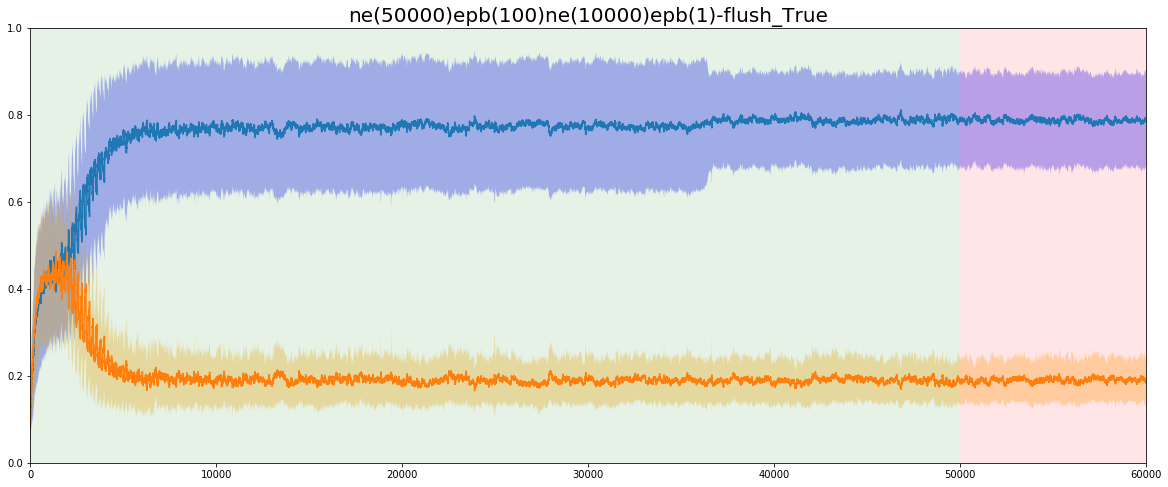

In [28]:
# load data
fpaths = glob('evaldata/*.npy')
fpath = fpaths[-4]

for fpath in fpaths[:1]:
  print(fpath)
  plt.close('all')
  evaldata = np.load(fpath)
  num_nets,num_epochs = evaldata.shape
  yhatdata = evaldata['yhat']

  # title
  splitfpath = fpath.split('/')[-1].split('-')
  curr = splitfpath[1].split('_')[-1]
  flush = splitfpath[-1].split('.')[0]
  title = '%s-%s'%(curr,flush)

  # compute mean and std between nets
  yhat_mean = np.mean(yhatdata,0).squeeze()
  yhat_std = np.std(yhatdata,0).squeeze()

  plot_yhatdata(yhat_mean,yhat_std,title=title)
  plt.savefig('figures/sub01_CSW100/'+title)
  